# Resale Flats Average and Count by month
---

### Import Libaries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

### Import Data

In [2]:
# get a list of all CSV files in a directory
csv_files = glob.glob('Raw Data/Resale Houses Data/*.csv')

# create an empty list to store DataFrames
dfs = []

# loop over each CSV file and read it into a DataFrame
for csv_file in csv_files:
    df = pd.read_csv(csv_file, usecols=['month', 'resale_price'])
    dfs.append(df)

# concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dfs)

# reset the index of the combined DataFrame
combined_df = combined_df.reset_index(drop=True)

# sort by month
combined_df = combined_df.sort_values(by=['month'])

# convert the month column to datetime format
combined_df['month'] = pd.to_datetime(combined_df['month'], format='%Y-%m')

# set the day component of the datetime object to 1
combined_df['month'] = combined_df['month'].dt.strftime('%Y-%m-01')

# convert the month column back to datetime format
combined_df['month'] = pd.to_datetime(combined_df['month'], format='%Y-%m-%d')

combined_df.head()

,month,resale_price
53056,1990-01-01,23400.0
53012,1990-01-01,70000.0
53011,1990-01-01,72000.0
53010,1990-01-01,60000.0
53009,1990-01-01,72000.0


### Average Price by Month

In [3]:
# Group by 'month' and calculate the average of 'resale_price'
monthly_average = combined_df.groupby(['month'])['resale_price'].mean()

# Create a new DataFrame with the results
monthly_average_df = pd.DataFrame({'month': monthly_average.index, 'average_price': monthly_average.values})

# show table
monthly_average_df.head()


,month,average_price
0,1990-01-01,65214.120770
1,1990-02-01,67871.052632
2,1990-03-01,66603.433913
3,1990-04-01,65930.152818
4,1990-05-01,67837.128535


### Plot Data

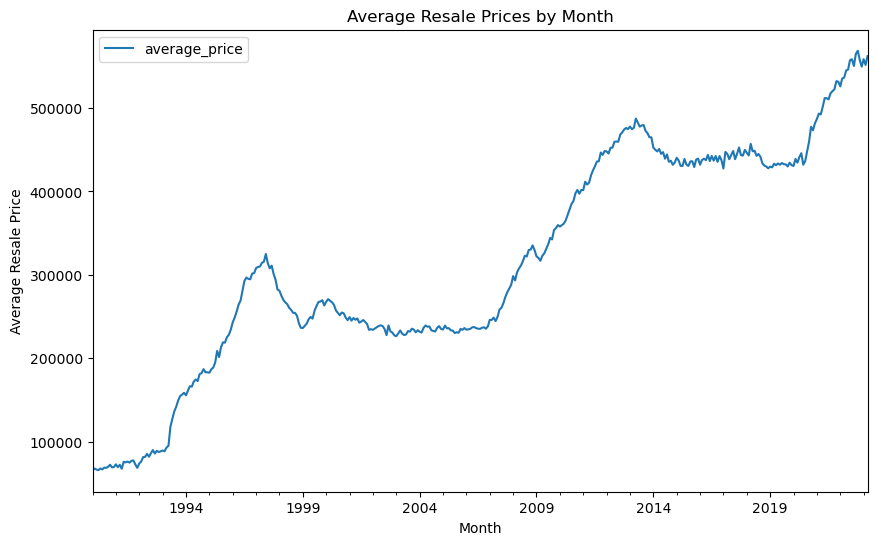

In [4]:
# Plot the data
monthly_average_df.plot(x='month', y='average_price', figsize=(10, 6))

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Average Resale Price')
plt.title('Average Resale Prices by Month')

# Show the plot
plt.show()

### Average Price by Year

In [5]:
yearly_df = combined_df

yearly_df['month'] = pd.to_datetime(yearly_df['month'])

yearly_df['year'] = yearly_df['month'].dt.year

yearly_df.drop(columns=['month'])

# Group by 'year' and calculate the average of 'resale_price'
yearly_average = yearly_df.groupby(['year'])['resale_price'].mean()

# Create a new DataFrame with the results
yearly_average_df = pd.DataFrame({'year': yearly_average.index, 'average_price': yearly_average.values})

# show table
yearly_average_df.head()

,year,average_price
0,1990,68086.142263
1,1991,73588.938934
2,1992,84372.635731
3,1993,132807.719750
4,1994,172619.529936


### Plot Data

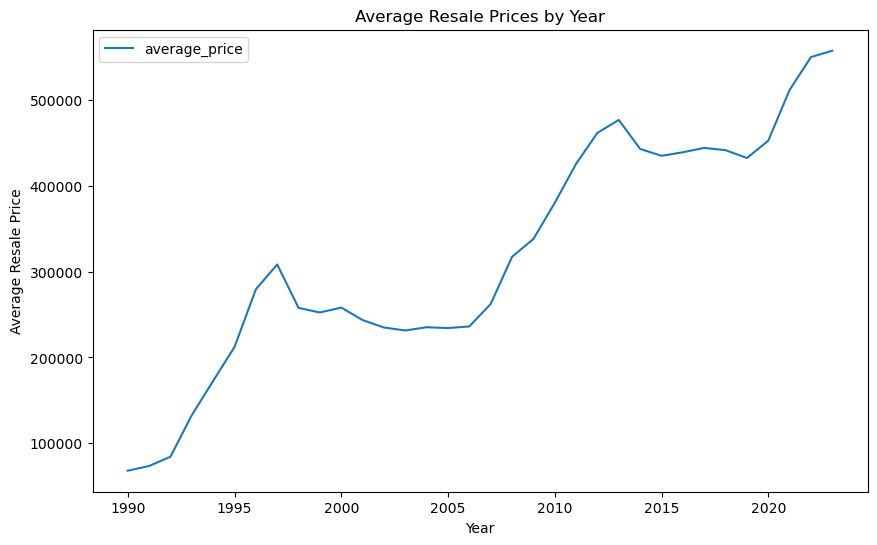

In [6]:
# Plot the data
yearly_average_df.plot(x='year', y='average_price', figsize=(10, 6))

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Resale Price')
plt.title('Average Resale Prices by Year')

# Show the plot
plt.show()

### Number of Flats sold per month

In [7]:
# Group by 'month' and count the number of rows in each group
monthly_count = combined_df.groupby(['month']).size()

# Create a new DataFrame with the results
monthly_count_df = pd.DataFrame({'month': monthly_count.index, 'number_sold': monthly_count.values})

# show table
monthly_count_df.head()

,month,number_sold
0,1990-01-01,1507
1,1990-02-01,931
2,1990-03-01,1150
3,1990-04-01,1047
4,1990-05-01,778


### Plot Data

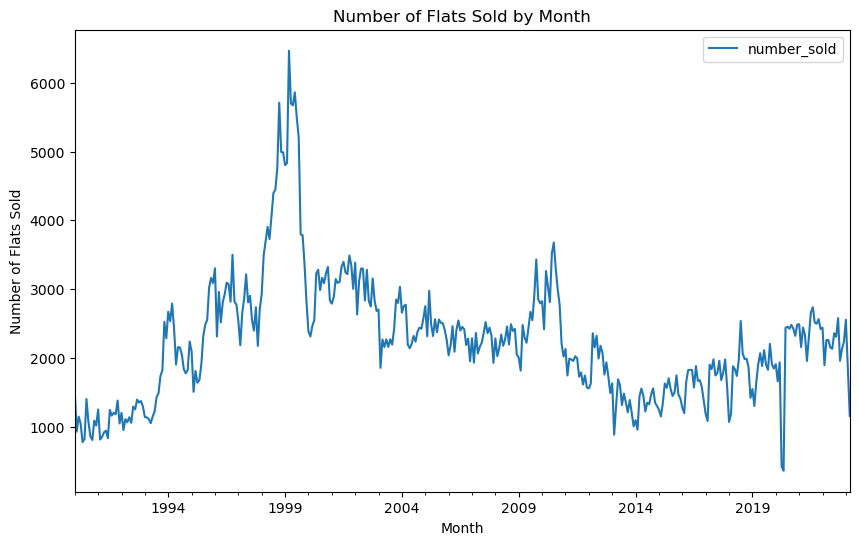

In [8]:
# Plot the data
monthly_count_df.plot(x='month', y='number_sold', figsize=(10, 6))

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Number of Flats Sold')
plt.title('Number of Flats Sold by Month')

# Show the plot
plt.show()

### Number of Flats sold per Year

In [9]:
# Group by 'year' and count the number of rows in each group
yearly_count = yearly_df.groupby(['year']).size()

# Create a new DataFrame with the results
yearly_count_df = pd.DataFrame({'year': yearly_count.index, 'number_sold': yearly_count.values})

# show table
yearly_count_df.head()

,year,number_sold
0,1990,12505
1,1991,12855
2,1992,14503
3,1993,18116
4,1994,26373


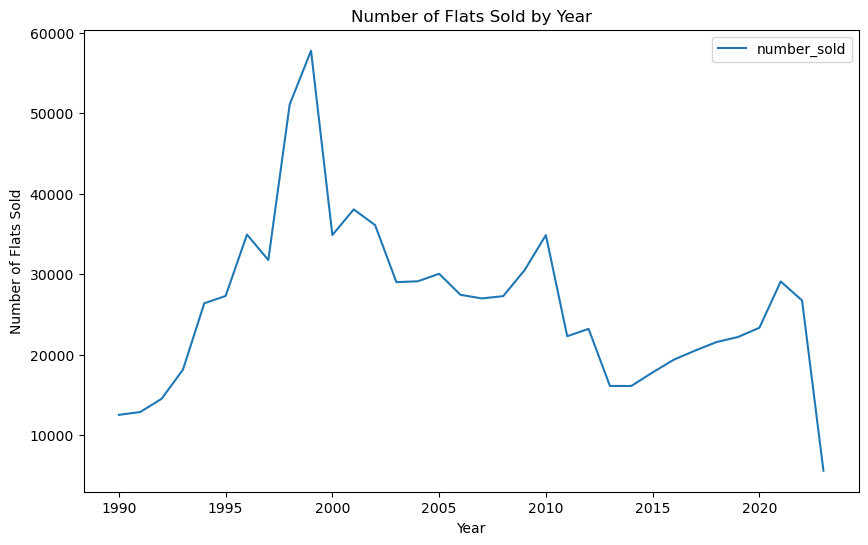

In [10]:
# Plot the data
yearly_count_df.plot(x='year', y='number_sold', figsize=(10, 6))

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Flats Sold')
plt.title('Number of Flats Sold by Year')

# Show the plot
plt.show()

### Export Table

In [11]:
# convert the 'year' column to datetime objects
yearly_average_df['year'] = pd.to_datetime(yearly_average_df['year'], format='%Y')
yearly_count_df['year'] = pd.to_datetime(yearly_count_df['year'], format='%Y')

# rename columns
monthly_average_df = monthly_average_df.rename(columns={'month': 'Year' , 'average_price': 'Monthly Average Resale Flat Prices'})
yearly_average_df = yearly_average_df.rename(columns={'year': 'Year' , 'average_price': 'Yearly Average Resale Flat Prices'})
monthly_count_df = monthly_count_df.rename(columns={'month': 'Year' , 'number_sold': 'Monthly Number of Resale Flats Sold'})
yearly_count_df = yearly_count_df.rename(columns={'year': 'Year' , 'number_sold': 'Yearly Number of Resale Flats Sold'})

# Export the monthly_average_df dataframe to CSV
monthly_average_df.to_csv('Cleaned Data/Average House Price, Monthly.csv')

# Export the monthly_count_df dataframe to CSV
monthly_count_df.to_csv('Cleaned Data/No. of Houses Sold, Monthly.csv')

# Export the yearly_average_df dataframe to CSV
yearly_average_df.to_csv('Cleaned Data/Average House Price, Yearly.csv')

# Export the yearly_count_df dataframe to CSV
yearly_count_df.to_csv('Cleaned Data/No. of Houses Sold, Yearly.csv')